In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
#import tensorflow_datasets as tfds
import pandas as pd
import seaborn as sns
%matplotlib inline

## Dataset

Download e preparação dos dados

In [ ]:
# Esta célula faz o download do dataset completo
Sample_dataset = tfds.load("oxford_iiit_pet", split="train", try_gcs=True)
assert isinstance(Sample_dataset, tf.data.Dataset)
Sample_dataset

In [24]:
path_csv = "./oxford_iiit_pet.csv"
path_images = "tensorflow_datasets/downloads/extracted/pets_images/images/"
formato = [".jpg", ".png"]

# Nesse dataset, os dados são separados por espaços, e as colunas não vem nomeadas
# por isso o seguinte tratamento
Load_dataset = pd.read_csv(path_csv, sep = " ", names ="Image CLASS_ID SPECIES BREED_ID".split())

# As imagens estão registradas apenas com o nome, então é adicionado o caminho local
# e em seguida é transformada em uma matriz compreensível para o matplotlib
Load_dataset["Image"] = [path_images + str(x) + formato[0] for x in Load_dataset["Image"]]
import matplotlib.image as img
Load_dataset["Image"] = [img.imread(x) for x in Load_dataset["Image"]] 

Load_dataset.tail() # as últimas linhas do dataframe

,Image,CLASS_ID,SPECIES,BREED_ID
3675,"[[[242, 208, 147], [244, 209, 151], [242, 211,...",37,2,25
3676,"[[[5, 5, 5], [6, 6, 6], [6, 6, 6], [5, 5, 5], ...",37,2,25
3677,"[[[41, 32, 23], [41, 31, 22], [36, 32, 20], [3...",37,2,25
3678,"[[[82, 112, 114], [84, 114, 116], [81, 111, 11...",37,2,25
3679,"[[[125, 114, 108], [126, 116, 107], [126, 116,...",37,2,25


## Separação dos dados de treino e de teste

In [25]:
X = Load_dataset["Image"] # Conjunto de dados
y = Load_dataset["SPECIES"] # Conjunto "alvo / classe"

In [10]:
X

0       [[0.007843138, 0.007843138, 0.007843138, 0.007...
1       [[0.007843138, 0.007843138, 0.007843138, 0.007...
2       [[0.007843138, 0.007843138, 0.007843138, 0.007...
3       [[0.007843138, 0.007843138, 0.007843138, 0.007...
4       [[0.007843138, 0.007843138, 0.007843138, 0.007...
                              ...                        
3675    [[0.011764706, 0.011764706, 0.011764706, 0.011...
3676    [[0.011764706, 0.011764706, 0.011764706, 0.011...
3677    [[0.011764706, 0.011764706, 0.011764706, 0.011...
3678    [[0.007843138, 0.007843138, 0.007843138, 0.007...
3679    [[0.011764706, 0.011764706, 0.011764706, 0.011...
Name: Image, Length: 3680, dtype: object

In [26]:
# divisão dos dados de teste (60%) e treino (40%)
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.4, random_state=101)


In [20]:
classes_names = ['gato', 'cachorro'] # 1: gato, 2: cachorro

In [19]:
train_images.head()

1759    [[0.007843138, 0.007843138, 0.007843138, 0.007...
2515    [[0.011764706, 0.011764706, 0.007843138, 0.007...
1859    [[0.007843138, 0.007843138, 0.007843138, 0.007...
406     [[0.007843138, 0.007843138, 0.007843138, 0.007...
800     [[0.007843138, 0.007843138, 0.007843138, 0.007...
Name: Image, dtype: object

In [17]:
train_images.shape

(2208,)

# Pré-processamento dos dados

Inspeção da primeira imagem

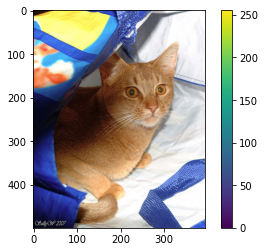

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Verificar que os dados estão no formato correto

In [ ]:
plt.figure(figsize=(10,10))


for i,x in enumerate(list(train_images.index[:25])):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[x], cmap=plt.cm.binary)
    plt.xlabel(classes_names[train_labels[x] - 1])
plt.show()

# Contrução do Modelo